In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error


In [3]:
data = pd.read_csv("../input/walmart-sales-data/Walmart_Store_sales.csv")

In [4]:
print(data.shape)
print(data.dtypes)
print(data.columns.values)
print(data.isnull().sum())


(6435, 8)
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object
['Store' 'Date' 'Weekly_Sales' 'Holiday_Flag' 'Temperature' 'Fuel_Price'
 'CPI' 'Unemployment']
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [5]:
data["Date"] = pd.to_datetime(data["Date"])
print(data.dtypes)
print(data["Date"].head())

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object
0   2010-05-02
1   2010-12-02
2   2010-02-19
3   2010-02-26
4   2010-05-03
Name: Date, dtype: datetime64[ns]


In [6]:
data["year"] = data["Date"].dt.year
data["day"] = data["Date"].dt.day
data["month"] = data["Date"].dt.month

In [7]:
data = data.drop("Date", axis=1)
print(data.head())
print(data.dtypes)


   Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0      1    1643690.90             0        42.31       2.572  211.096358   
1      1    1641957.44             1        38.51       2.548  211.242170   
2      1    1611968.17             0        39.93       2.514  211.289143   
3      1    1409727.59             0        46.63       2.561  211.319643   
4      1    1554806.68             0        46.50       2.625  211.350143   

   Unemployment  year  day  month  
0         8.106  2010    2      5  
1         8.106  2010    2     12  
2         8.106  2010   19      2  
3         8.106  2010   26      2  
4         8.106  2010    3      5  
Store             int64
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
year              int64
day               int64
month             int64
dtype: object


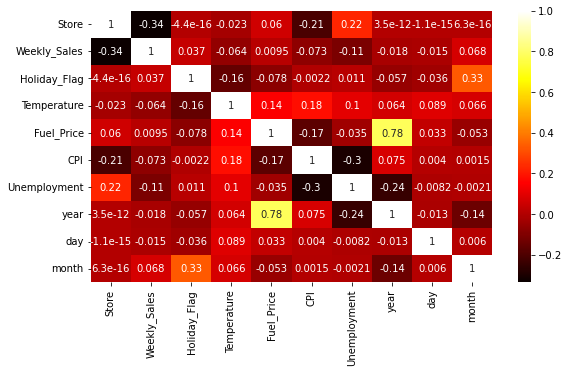

In [8]:
plt.figure(figsize=(9,5))
sns.heatmap(data.corr(), annot=True, cmap="hot")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


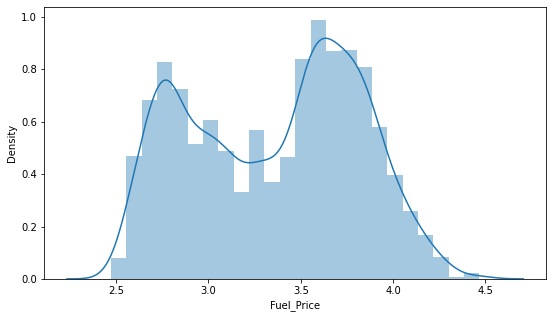

In [9]:
plt.figure(figsize=(9,5))
sns.distplot(data["Fuel_Price"])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


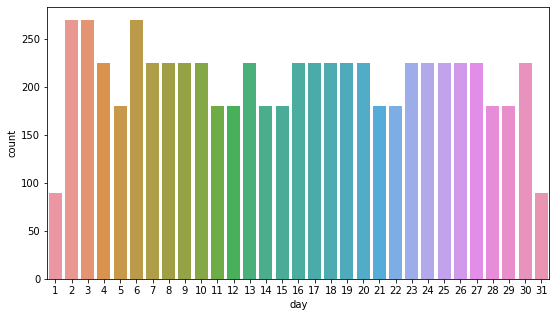

In [10]:
plt.figure(figsize=(9,5))
sns.countplot(data["day"])
plt.show()

In [11]:
print(data.groupby("day")["Fuel_Price"].sum().sort_values(ascending=False))

day
6     930.400
3     894.901
2     839.771
13    794.084
20    794.074
27    792.254
8     785.537
4     762.454
24    759.077
18    758.092
25    756.108
17    755.737
10    753.975
9     748.802
16    742.190
30    739.911
23    739.881
7     735.378
19    717.622
26    713.435
5     661.003
29    631.096
22    630.998
15    627.714
21    607.690
28    602.852
14    602.671
11    572.696
12    567.965
31    306.778
1     287.489
Name: Fuel_Price, dtype: float64


In [12]:
print(data.groupby("year")["Fuel_Price"].sum().sort_values(ascending=False))

year
2011    8334.881
2012    7178.417
2010    6099.337
Name: Fuel_Price, dtype: float64


In [13]:
x = data.drop("Fuel_Price", axis=1)
y = data["Fuel_Price"]
print(y[:5])

0    2.572
1    2.548
2    2.514
3    2.561
4    2.625
Name: Fuel_Price, dtype: float64


In [14]:
ss = StandardScaler()
x = ss.fit_transform(x)
print(x[:5])


[[-1.69397911  1.05741972 -0.27420425 -0.99513556  1.00417522  0.05696366
  -1.21089907 -1.55946462 -0.44422923]
 [-1.69397911  1.05434796  3.64691651 -1.20117022  1.00788038  0.05696366
  -1.21089907 -1.55946462  1.66322793]
 [-1.69397911  1.00120591 -0.27420425 -1.12417832  1.009074    0.05696366
  -1.21089907  0.382676   -1.34742516]
 [-1.69397911  0.64282842 -0.27420425 -0.7609067   1.00984902  0.05696366
  -1.21089907  1.18238096 -1.34742516]
 [-1.69397911  0.89991372 -0.27420425 -0.76795525  1.01062404  0.05696366
  -1.21089907 -1.44522106 -0.44422923]]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=44, shuffle =True)
print(X_train.shape)
print(y_train.shape)


(4311, 9)
(4311,)


In [16]:
Ln = LinearRegression()
Ln.fit(X_train, y_train)

print(Ln.score(X_train, y_train))
print(Ln.score(X_test, y_test))

0.6813837080707438
0.7047272364940171


In [17]:
for x in range(2,20):
    Dt = DecisionTreeRegressor(max_depth=x,random_state=33)
    Dt.fit(X_train, y_train)

    print("x = ", x)
    print(Dt.score(X_train, y_train))
    print(Dt.score(X_test, y_test))
    print("_"*100)


x =  2
0.7437374773559373
0.7390975308765376
____________________________________________________________________________________________________
x =  3
0.7992729782658202
0.7935043853044854
____________________________________________________________________________________________________
x =  4
0.8319266953709813
0.8244189416361256
____________________________________________________________________________________________________
x =  5
0.8636104460342617
0.8593732168702918
____________________________________________________________________________________________________
x =  6
0.8905874873401645
0.8875902249735061
____________________________________________________________________________________________________
x =  7
0.9137963935603478
0.9105898522589981
____________________________________________________________________________________________________
x =  8
0.9341664838652732
0.9280159392321741
_______________________________________________________________________________

In [18]:
Dt = DecisionTreeRegressor(max_depth=15,random_state=33)
Dt.fit(X_train, y_train)

print(Dt.score(X_train, y_train))
print(Dt.score(X_test, y_test))

0.9976140197920991
0.9645057140174054


In [19]:
y_pred = Dt.predict(X_test)
y_pred[:5]

array([2.784 , 2.668 , 3.6332, 3.223 , 3.503 ])

In [20]:
ma = mean_absolute_error(y_test,y_pred)
print(ma)

0.045833215485030686


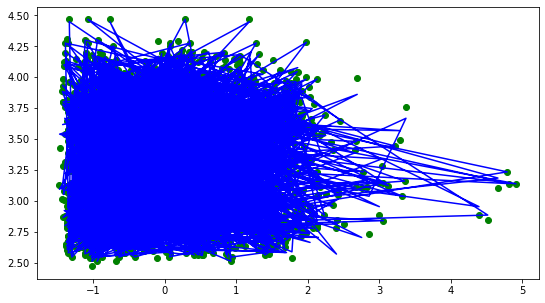

In [21]:
plt.figure(figsize=(9,5))
plt.scatter(X_test[:,1], y_test, color="g")
plt.plot(X_test[:,1], y_pred, color="b")
plt.show()

In [22]:
autput = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
# autput.to_csv("autput.csv",index=False)